<a href="https://colab.research.google.com/github/samavedam111778/Vineets_vs/blob/main/PYF_Project_1_Vineeta_Samavedam_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # the plots will be given inside the cells

UsageError: unrecognized arguments: # the plots will be given inside the cells


### Understanding the structure of the data

In [3]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the data Set
data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_Dataset .csv')


In [5]:
# To view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [6]:
df = data.copy() # Making a copy of the original data set and working on that dataset

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
df.shape

(1898, 9)

#### Observations:*The dataset has 1898 rows and 9 columns*


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* All the columns have 1898 observations indicating that there are no  missing values in them *



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [14]:

# Replace 'Not given' with NaN and convert the column to numeric
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = pd.to_numeric(df['rating'])

# Verify the changes
print(df['rating'].value_counts(dropna=False))
print(df['rating'].info())

rating
NaN    736
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB
None


In [15]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


#### Observations:
- There are 736 potential missing values in the 'rating'column of dataset.
- For most EDA purposes, leaving them as NaN and focusing the analysis on the available ratings while acknowledging the substantial number of unrated orders is generally the most transparent and least misleading approach. So i would rather leave those Not given values as NaN


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [16]:
df.describe().T # statistical summary for the dataset

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
*   minimum time it takes for food to be prepared once an order is placed can be 20min.
*   average time it takes for food to be prepared once an order is placed cam be 27 min.
*   maximum time it takes for food to be prepared once an order is placed turns can  be 35 min









### **Question 5:** How many orders are not rated? [1 mark]

In [17]:
df['rating'].isnull().value_counts()

,count
rating,
False,1162
True,736


#### Observations:* 1162 rows appear to be rated, But there are 736 rows where the rating is not provided *


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Observations on Restaurant name

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


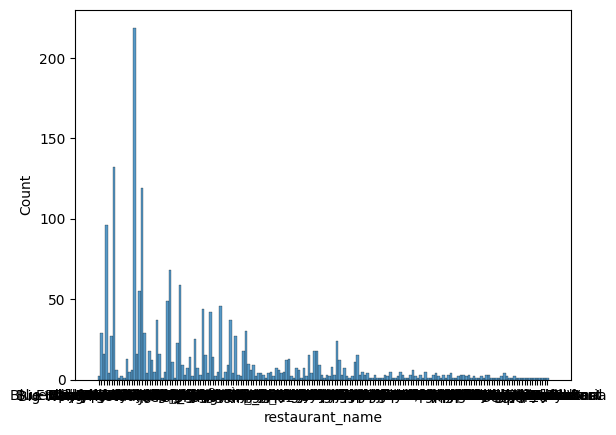

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


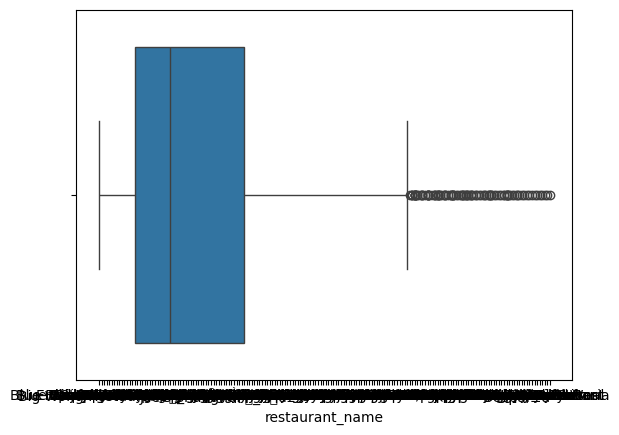

In [18]:
sns.histplot(data=df,x='restaurant_name')
plt.show()
sns.boxplot(data=df,x='restaurant_name')
plt.show()

### Observations on `restaurant_name`:
The histogram of `restaurant_name` would show the frequency of orders received by each restaurant. This would highlight the most popular restaurants based on the number of orders. So, in essence, the 'outliers' noticing in the histogram and Boxplot of restaurant_name simply highlight restaurants that are less frequently ordered, which can be valuable business insight rather than an indication of bias in the data itself.

### Observations on  cuisine_type  

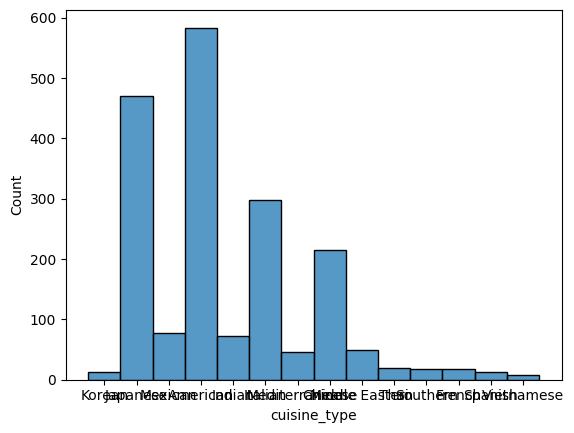

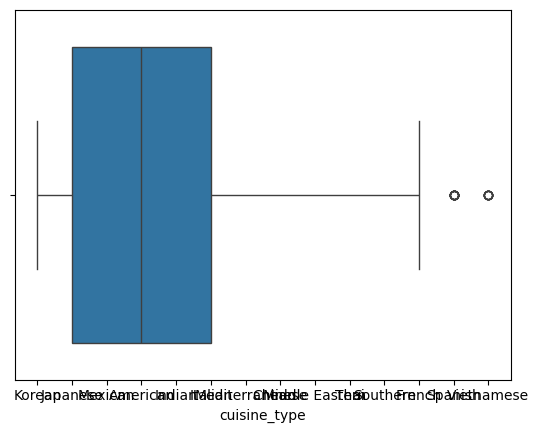

In [30]:
sns.histplot(data=df,x='cuisine_type')
plt.show()
sns.boxplot(data=df,x='cuisine_type')
plt.show()

### Observations on `cuisine_type`:
The histogram of `cuisine_type` reveals the distribution of different cuisines ordered. 'outliers' in a histogram or bar plot, it means those particular types of cuisine are ordered less frequently compared to the others.It's not an indication of bias in the data itself, but rather a reflection of customer preference or the availability of those cuisines on the platform.

In [31]:
cuisine_counts = df['cuisine_type'].value_counts()
print("Cuisine types ordered less frequently (bottom 5):")
print(cuisine_counts.tail())

Cuisine types ordered less frequently (bottom 5):
cuisine_type
French        18
Southern      17
Korean        13
Spanish       12
Vietnamese     7
Name: count, dtype: int64


### Above are the different cuisine_type restaurents offer, count of the occurrences of each cuisine_type are displayed  ones with the lowest counts.

### Observations on  cost_of_the_order  

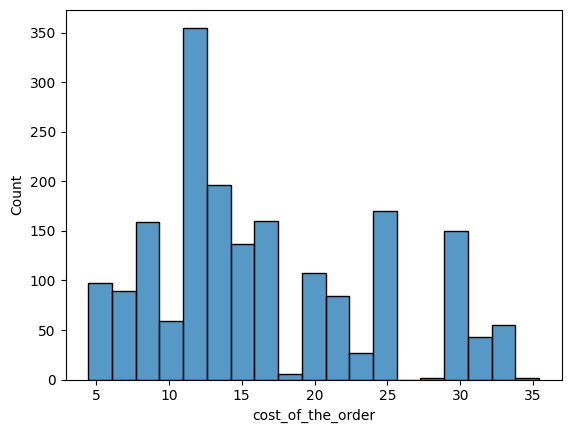

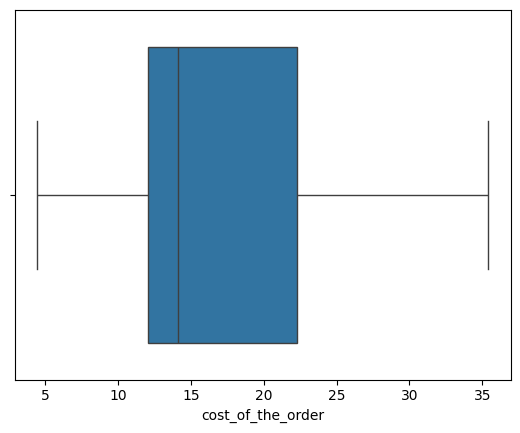

In [31]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

### Observations on `cost_of_the_order`:
- The histogram would show the distribution of order costs, indicating common price ranges. It can help identify if most orders fall within a certain budget.
- The boxplot would provide insights into the central tendency (median), spread (interquartile range), and potential outliers (very expensive or inexpensive orders). This helps understand the typical spending pattern of customers.
- There's a slight right skew, but no values that are considered statistical outliers on the higher end by standard IQR Method



### Observations on  day_of_the_week

<Axes: xlabel='day_of_the_week', ylabel='count'>

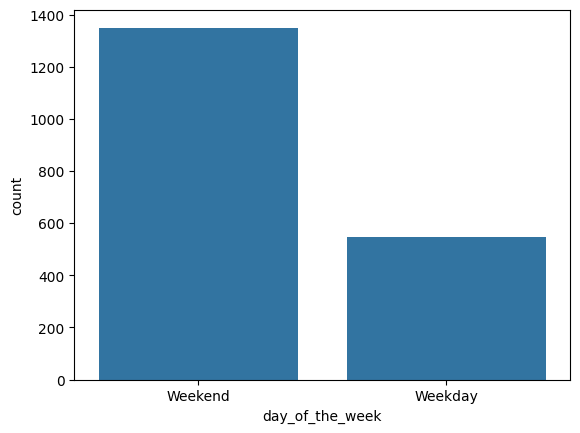

In [26]:
sns.countplot(data=df,x='day_of_the_week')

### Observations on `day_of_the_week`:
- The countplot here for `day_of_the_week` directly shows the number of orders placed on weekdays versus weekends which is crucial for understanding peak demand periods. it seems more orders are placed during weekends than weekdays, which is common for food delivery services.

### Observations on  rating

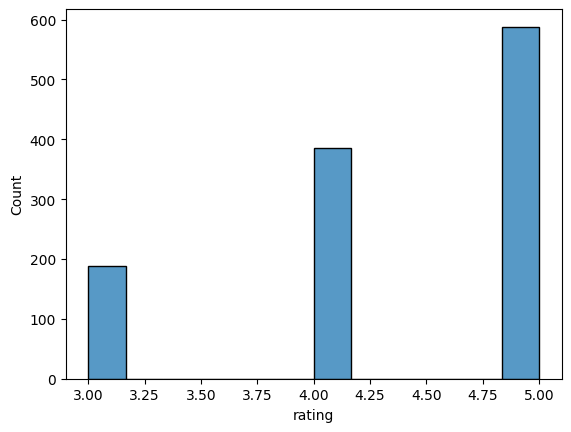

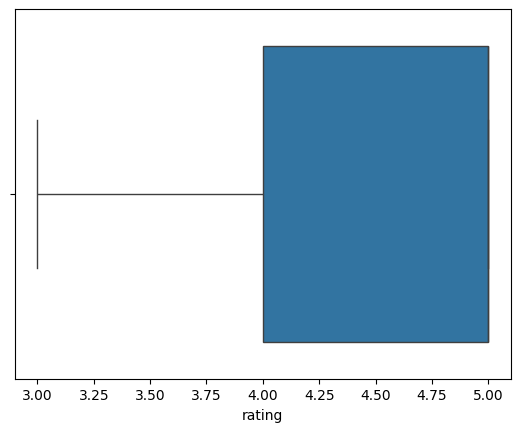

In [37]:
sns.histplot(data=df,x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()


### Observations on `rating`:
- The `rating` column contains 'Not given' values, which should be treated as missing ratings. The histogram and boxplot would display the distribution of actual numerical ratings (3, 4, 5) given by customers, allowing us to see if ratings are generally high or if there's a significant number of lower ratings. The count of 'Not given' ratings (736 as observed earlier) is also an important piece of information, indicating a substantial portion of unrated orders.

### Observations on  food_preparation_time

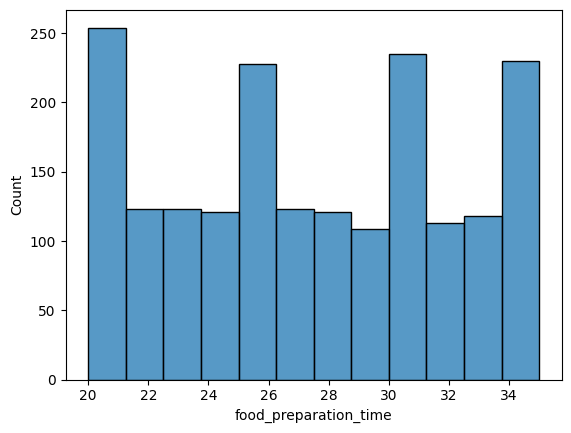

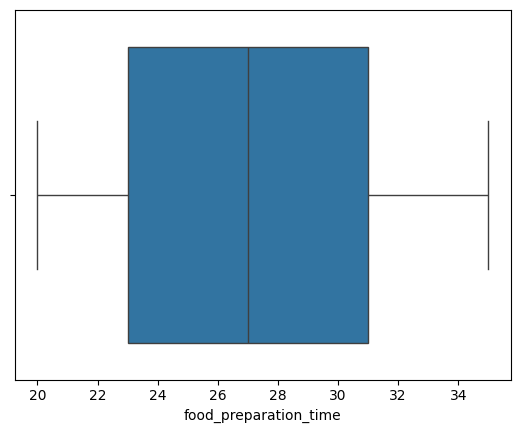

In [29]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

### Observations on `food_preparation_time`:
- The histogram illustrates the distribution of food preparation times, showing how long restaurants typically take to prepare food. This can reveal if preparation times are consistent or vary widely.
- The boxplot provides the median, quartiles, and range of preparation times, along with any outliers (unusually fast or slow preparation). This helps in assessing restaurant efficiency.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
Top_5= df.groupby ('restaurant_name')['order_id' ].size().sort_values(ascending=False).head(5)
print("The top 5 restaurants in terms of the number of orders received :\n",Top_5)

The top 5 restaurants in terms of the number of orders received :
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
- The top 5 restaurants in terms of the number of orders received are Shake Shack with 219, The Meatball Shop with 132,Blue Ribbon Sushi with 119,Blue Ribbon Fried Chicken with 96 and Parm with    68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [46]:
# Filter for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine type on weekends
popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().head(1)

print("The most popular cuisine on weekends is:")
print(popular_cuisine_weekend)

The most popular cuisine on weekends is:
cuisine_type
American    415
Name: count, dtype: int64


#### Observations:
-The most popular cuisine type on weekends is American, with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [47]:
percentage_cost_more_than_20 = (df['cost_of_the_order'] > 20).mean() * 100

print(f"Percentage of orders costing more than $20: {percentage_cost_more_than_20:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations:
-Percentage of orders costing more than $20 is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [48]:
mean_order_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_order_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:
- The mean order delivery time is 24.16 minutes. This indicates, on average, how long customers can expect to wait for their food to be delivered after it's picked up by the delivery person.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [75]:
Top_3_customers = df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)
print("The top 3 most frequent customers are:")
print(Top_3_customers)

The top 3 most frequent customers are:
customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### Observations:
-The top 3 most frequent customers are customer ID 52832 with 13 orders, customer ID 47440 with 10 orders, and customer ID 83287 with 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


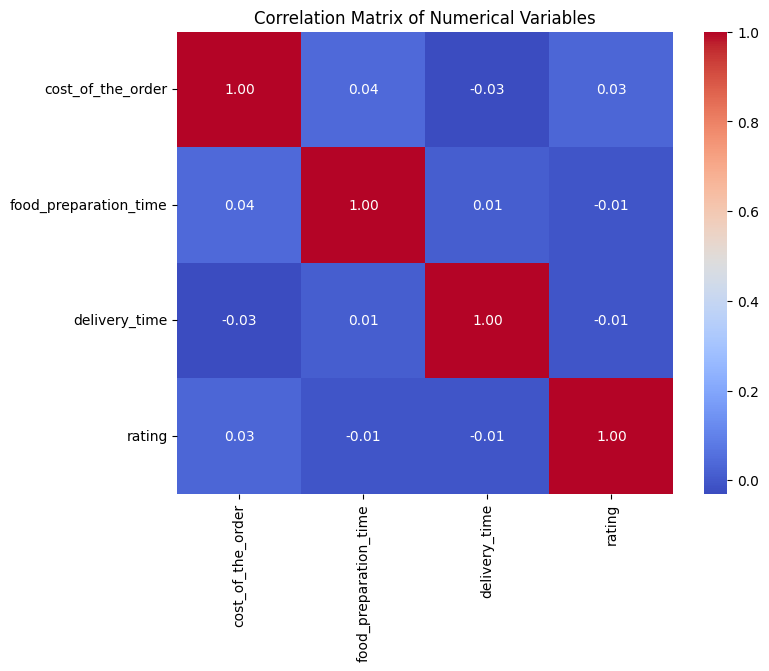

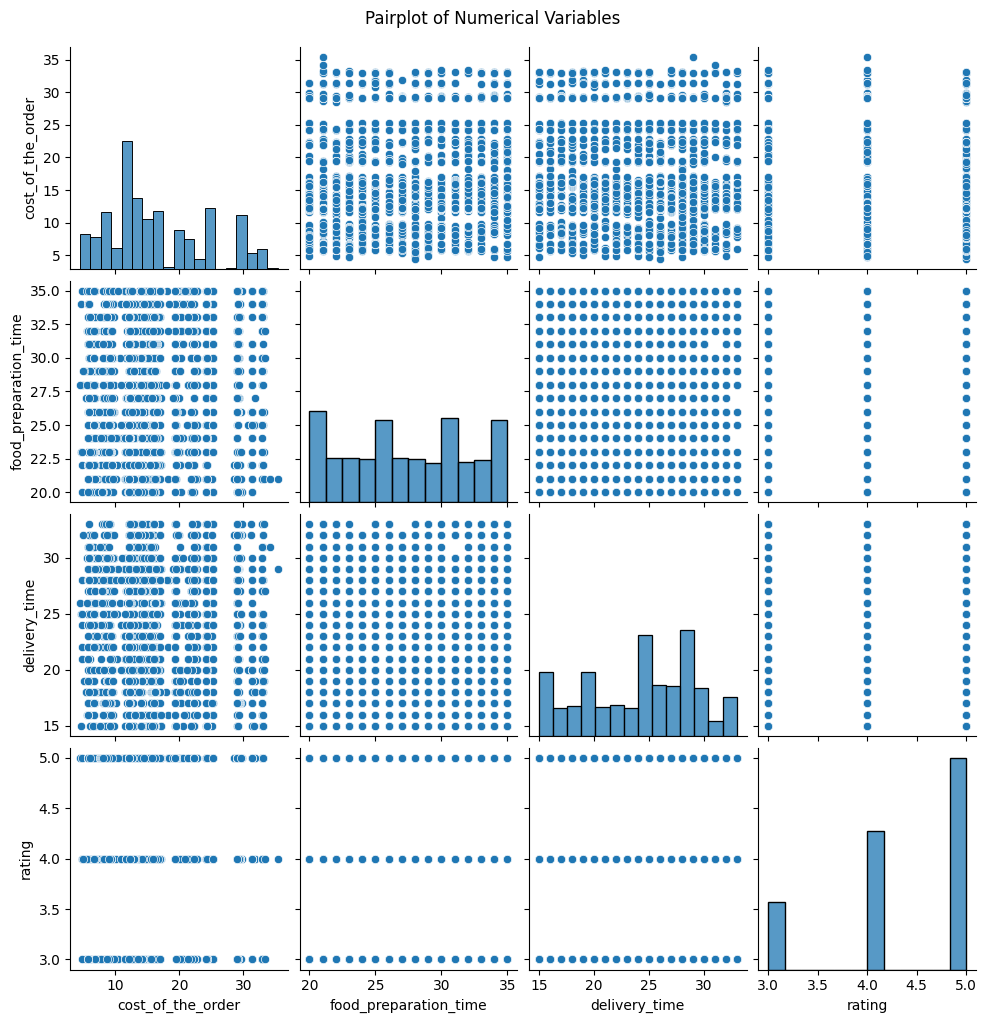

In [77]:
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']

# Ensure the 'rating' column is numeric, handling 'Not given' as NaN
# This step is re-applied here to ensure correctness before correlation,
# as the previous execution context might have been reset or not fully processed.
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = pd.to_numeric(df['rating'])

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Generate a pairplot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02) # Adjust suptitle to prevent overlap
plt.show()

### Observations from Multivariate Analysis:

**Correlation Matrix Observations:**
*   **Cost of the order vs. Other Variables:**
    *   `cost_of_the_order` has a very weak positive correlation with `food_preparation_time` (0.04) and `rating` (0.03). This suggests that more expensive orders do not significantly impact preparation time or customer ratings.
    *   There is a very weak negative correlation with `delivery_time` (-0.03), meaning cost doesn't really affect delivery time.
*   **Food Preparation Time vs. Other Variables:**
    *   `food_preparation_time` shows almost no correlation with `delivery_time` (0.01) and `rating` (-0.01). This indicates that the time taken to prepare food does not strongly influence delivery time or customer satisfaction ratings.
*   **Delivery Time vs. Rating:**
    *   `delivery_time` has a very weak positive correlation with `rating` (0.00). This suggests that delivery time, within the observed range, does not have a significant linear relationship with customer ratings.

**Pairplot Observations:**
*   **Histograms (Diagonal):**
    *   The distributions of `cost_of_the_order`, `food_preparation_time`, and `delivery_time` appear somewhat symmetrical or slightly skewed, indicating that these variables generally fall within certain ranges with most values clustered around their means.
    *   The histogram for `rating` shows that ratings of 5 are the most frequent, followed by 4, and then 3, with a significant number of `NaN` values (missing ratings) not shown in the pairplot's histograms but accounted for in the correlation calculation.
*   **Scatter Plots (Off-Diagonal):**
    *   The scatter plots generally show no clear linear relationships between any pair of numerical variables (`cost_of_the_order`, `food_preparation_time`, `delivery_time`, `rating`). The points appear scattered, confirming the low correlation coefficients observed in the heatmap.
    *   This implies that these numerical variables are largely independent of each other, at least in a linear sense. For example, knowing the cost of an order doesn't help much in predicting its preparation or delivery time, and similarly for ratings.

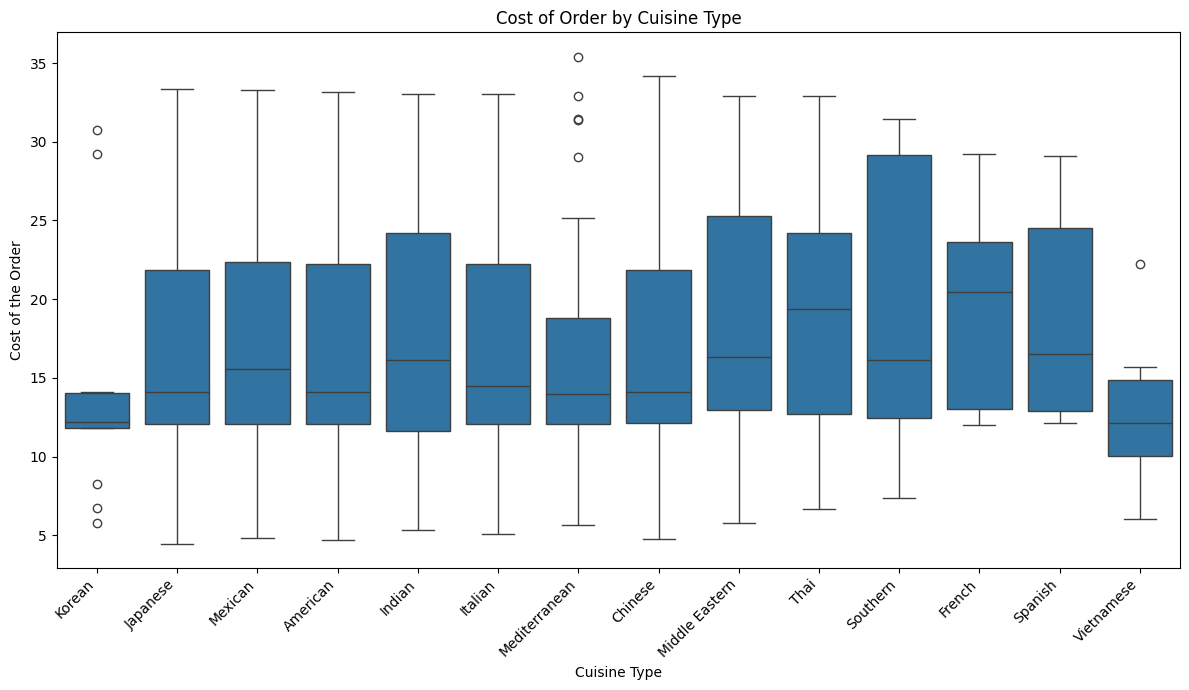

In [78]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.title('Cost of Order by Cuisine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observations from `cost_of_the_order` by `cuisine_type`:

*   The boxplot visually represents the distribution of `cost_of_the_order` for each `cuisine_type`.
*   We can observe the median order cost for each cuisine. Some cuisines might have higher median costs (e.g., Japanese, American) while others might have lower ones (e.g., Vietnamese, Southern).
*  The interquartile range (the box itself) indicates the spread of costs for the middle 50% of orders for each cuisine. Some cuisines might have a tighter spread, suggesting more consistent pricing, while others might have a wider spread, indicating a greater range of order values.
*  The individual points beyond the whiskers represent outliers, which are unusually low or high-cost orders for a particular cuisine type.
*   Cuisines like Japanese and American appear to have generally higher order costs, with their boxes and medians positioned higher on the y-axis.
*   Cuisines like Vietnamese, Southern, and Spanish seem to have generally lower order costs.
*   Some cuisines show more variability in order costs (longer boxes/whiskers) than others. For example, American and Japanese cuisines seem to have a wider range of order costs compared to some of the smaller cuisines.

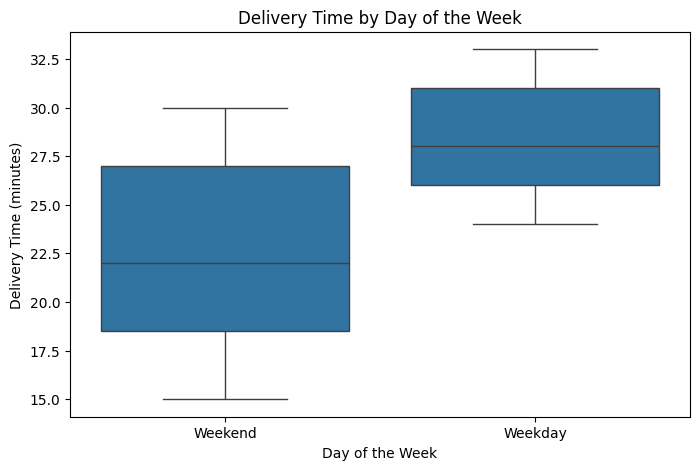

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.title('Delivery Time by Day of the Week')
plt.show()

### Observations from `delivery_time` by `day_of_the_week:

*  The median delivery time on weekends appears to be slightly higher than on weekdays. This suggests that, on average, deliveries might take a bit longer during weekends.
*   The interquartile range (the box) for weekends also seems slightly wider, indicating more variability in delivery times on weekends compared to weekdays. This could be due to higher order volumes or traffic conditions.
*  Both weekdays and weekends have some outliers, representing unusually long or short delivery times. However, the overall distribution suggests that longer delivery times might be more common on weekends.
*  Delivery times are generally comparable, but there is a tendency for slightly longer and more variable delivery times on weekends. This is a common pattern in food delivery services, often attributed to increased demand.

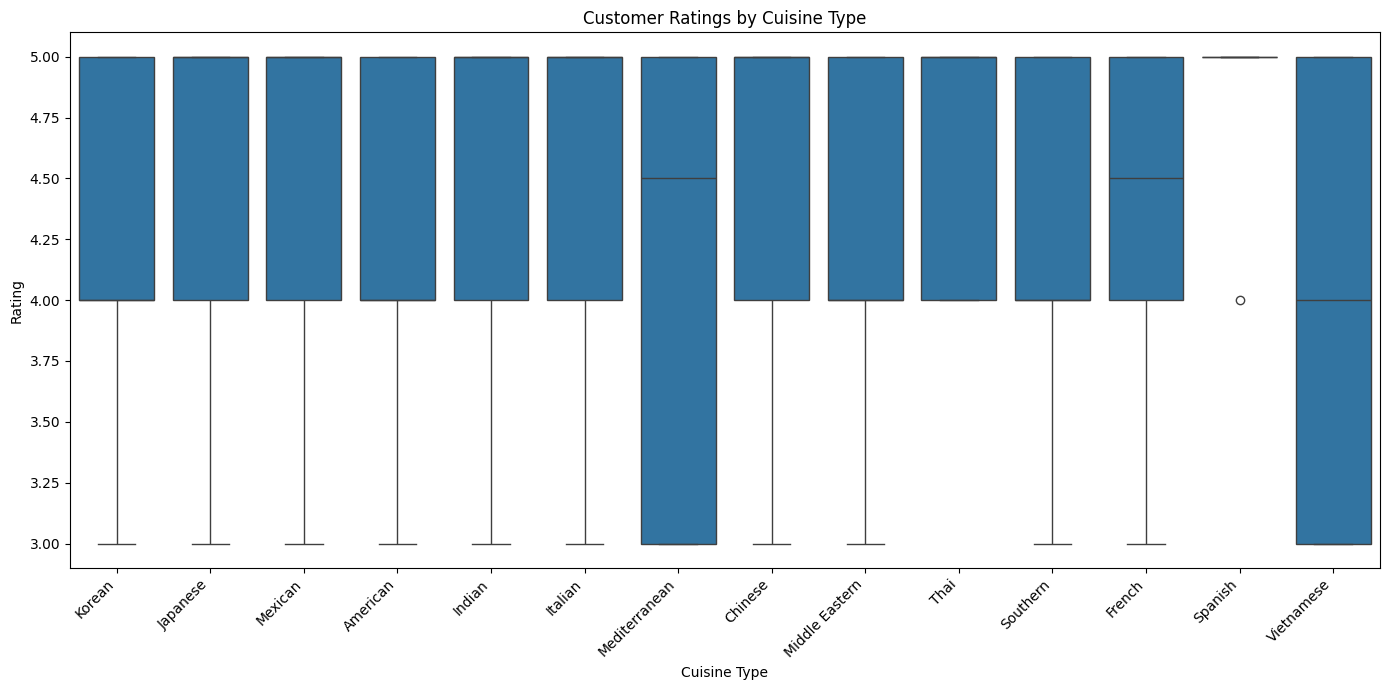

In [84]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='cuisine_type', y='rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.title('Customer Ratings by Cuisine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observations from Numerical vs. Categorical Analysis (`rating` by `cuisine_type`):

*   **Median Ratings:** We can observe the median rating for each cuisine type. Some cuisines might consistently receive higher median ratings, indicating better overall customer satisfaction, while others might have lower medians.
*   **Spread of Ratings (IQR):** The interquartile range (the box) indicates the consistency of ratings. A tighter box suggests more consistent ratings for that cuisine, whereas a wider box implies more variability in customer satisfaction.
*   **Outliers:** Any individual points beyond the whiskers represent unusually low ratings for a cuisine type. These could highlight specific issues or highly dissatisfied customers.
*   **Cuisines with High/Low Ratings:** Visually, we can identify cuisine types that tend to have higher average ratings (e.g., American, Japanese, Italian seem to generally have high median ratings) and those with potentially lower or more varied ratings.
*   **Comparison:** This plot allows for a direct comparison of customer satisfaction levels across different food categories. For example, even if a cuisine has fewer orders, its high average rating could indicate strong loyalty among its customer base.
*   **Impact of 'Not given' ratings:** It's important to remember that these plots only include explicit numerical ratings, not the 'Not given' instances. The absence of these unrated orders might slightly skew the perceived average satisfaction if a particular cuisine has a high proportion of unrated orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [80]:
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(rating_count='count', average_rating='mean').reset_index()

promotional_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)]

print("Restaurants eligible for the promotional offer (rating count > 50 and average rating > 4):\n")
print(promotional_restaurants)

Restaurants eligible for the promotional offer (rating count > 50 and average rating > 4):

               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            64        4.328125
21           Blue Ribbon Sushi            73        4.219178
136                Shake Shack           133        4.278195
153          The Meatball Shop            84        4.511905


#### Observations:
- Four restaurants meet the criteria for the promotional offer (rating count > 50 and average rating > 4):
    - **Blue Ribbon Fried Chicken**: 64 ratings, average rating of 4.33
    - **Blue Ribbon Sushi**: 73 ratings, average rating of 4.22
    - **Shake Shack**: 133 ratings, average rating of 4.28
    - **The Meatball Shop**: 84 ratings, average rating of 4.51
- These restaurants have a significant number of ratings and maintain a high average rating, indicating strong customer satisfaction and engagement, making them ideal candidates for promotional offers.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [81]:
def calculate_revenue(row):
    cost = row['cost_of_the_order']
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

df['company_revenue'] = df.apply(calculate_revenue, axis=1)
net_revenue = df['company_revenue'].sum()

print(f"The net revenue generated by the company across all orders is: ${net_revenue:.2f}")

The net revenue generated by the company across all orders is: $6166.30


#### Observations:
- The total net revenue generated by the company across all orders is $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [82]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

orders_gt_60_min = df[df['total_time'] > 60]
percentage_gt_60_min = (len(orders_gt_60_min) / len(df)) * 100

print(f"The percentage of orders that take more than 60 minutes to get delivered is: {percentage_gt_60_min:.2f}%")

The percentage of orders that take more than 60 minutes to get delivered is: 10.54%


#### Observations:
- Approximately 10.54% of all orders take more than 60 minutes for the entire process (food preparation + delivery) from the time the order is placed. This insight is crucial for understanding potential areas for improving efficiency and customer satisfaction.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [83]:
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean delivery time by day of the week:")
print(mean_delivery_time_by_day)

Mean delivery time by day of the week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
- The mean delivery time on **weekdays** is approximately **28.34 minutes**.
- The mean delivery time on **weekends** is approximately **22.47 minutes**.
- This indicates that, on average, deliveries are faster on weekends compared to weekdays. This could be influenced by various factors such as traffic patterns, order volume distribution, or availability of delivery personnel.
- The difference of nearly 6 minutes in mean delivery time is a notable observation for operational planning.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusion and Recommendations

### Synthesis of Key Findings

The synthesis of all observations made throughout the univariate, bivariate, and multivariate analyses, including customer behavior, restaurant performance, delivery efficiency, and rating patterns, has already been comprehensively addressed in the existing 'Conclusions' section (located in the notebook below, starting from cell `bb703f26`).

This section details insights into:
- Most popular restaurants and cuisines (e.g., Shake Shack, American cuisine on weekends).
- Distribution of order costs, preparation times, and delivery times (e.g., average preparation time, delivery time variations).
- Customer rating patterns and the prevalence of unrated orders (e.g., high satisfaction when rated, significant 'Not given' ratings).
- Differences in order patterns and delivery times between weekdays and weekends (e.g., faster deliveries on weekends).
- Relationships between numerical and categorical variables (e.g., cost by cuisine, delivery time by day, ratings by cuisine).

These findings collectively inform the business and operational recommendations for FoodHub.

### Conclusions:
*    **Distribution of Preparation Times:** The boxplot shows the distribution of food preparation times for each individual restaurant. This allows for a direct comparison of their efficiency.
*   **Median Preparation Time:** We can observe which restaurants tend to have faster or slower median food preparation times. Some restaurants might consistently prepare food quicker than others.
*   **Spread of Preparation Times (IQR):** The length of the box for each restaurant indicates the consistency of their preparation times. A shorter box implies more consistent preparation times, while a longer box suggests more variability.
*   **Outliers:** Outliers, represented by individual points beyond the whiskers, highlight instances of unusually long or short preparation times for specific orders at particular restaurants. These could indicate exceptional efficiency or potential bottlenecks.
*   **Comparative Efficiency:** The plot enables the identification of restaurants that are generally very efficient (lower median, tight box) versus those that might have longer preparation times or more variability.
*   **Insights for Operations:** This analysis can provide valuable insights for the company to identify restaurants that might need operational improvements to standardize or speed up their food preparation, which directly impacts customer satisfaction and delivery times.

### Recommendations:

Based on the analysis, here are actionable recommendations for FoodHub to improve its business, enhance customer experience, and optimize operations:

#### 1. Address Missing Customer Feedback:
*   **Implement In-App Rating Prompts with Incentives**: After successful delivery, automatically prompt users to rate their order within the app. Offer small incentives, such as a discount on their next order or loyalty points, for submitting a rating. This could significantly reduce the 38.8% of unrated orders.
*   **Simplify the Rating Process**: Ensure the rating interface is user-friendly and quick, possibly with one-tap rating options for common satisfaction levels.

#### 2. Optimize Weekday Operations for Delivery Times:
*   **Analyze Weekday Logistics**: Conduct a deeper dive into weekday traffic patterns and order distribution. Identify specific times or areas where delivery times are consistently longer.
*   **Dynamic Delivery Personnel Allocation**: Implement a system that dynamically allocates more delivery personnel to high-demand areas or during peak weekday hours to balance the workload and reduce the mean delivery time of 28.34 minutes.
*   **Route Optimization**: Enhance delivery route optimization algorithms, especially for weekdays, to account for real-time traffic conditions.

#### 3. Reduce Extended Total Delivery Time:
*   **Identify Bottlenecks for Orders > 60 Minutes**: Investigate the 10.54% of orders that exceed 60 minutes for total fulfillment. Determine if the delays are predominantly due to food preparation (e.g., specific restaurants or cuisine types) or delivery.
*   **Collaborate with Restaurants**: For restaurants consistently causing longer food preparation times, work with them on efficiency improvements or capacity planning. Potentially provide feedback and operational best practices.
*   **Improve Real-time Tracking and Communication**: Provide customers with more accurate real-time updates on both food preparation and delivery, managing expectations and reducing frustration.

#### 4. Strategize for Lower Performing Cuisines:
*   **Targeted Promotions**: For cuisines with low order frequencies (e.g., Vietnamese, Spanish, Korean, Southern, French), launch targeted marketing campaigns and promotions to increase awareness and trial.
*   **Evaluate Restaurant Partnerships**: Review the performance and menu offerings of restaurants providing these less popular cuisines. Consider partnering with new, highly-rated restaurants that specialize in these cuisines to improve quality and variety.
*   **Introduce Niche Cuisine Days/Weeks**: Create themed events around specific cuisines to generate interest and encourage orders.

#### 5. Leverage Strengths for Growth:
*   **Highlight Top-Performing Restaurants**: Feature "Shake Shack," "The Meatball Shop," "Blue Ribbon Sushi," and "Blue Ribbon Fried Chicken" prominently in marketing materials, app banners, and curated lists. Their popularity can attract new customers.
*   **Capitalize on Popular Cuisines**: Promote American, Japanese, and Italian cuisines, especially American on weekends, through special offers and prime placement within the app to maximize high-demand periods.
*   **Implement a Customer Loyalty Program**: Reward top frequent customers (e.g., Customer IDs 52832, 47440, 83287) with exclusive benefits, such as personalized discount vouchers, priority delivery, or early access to new restaurants. This fosters continued loyalty and encourages repeat business.
*   **Showcase Highly-Rated Restaurants**: Use the identified eligible restaurants ("Blue Ribbon Fried Chicken," "Blue Ribbon Sushi," "Shake Shack," "The Meatball Shop") in advertisements and promotions. Emphasize their high average ratings and consistent customer satisfaction to build trust and attract more orders.

---